In [54]:
from tensorflow import keras, nn

import matplotlib.pyplot as plt

## Data

In [55]:
dataset = keras.datasets.fashion_mnist

In [56]:
train_data, test_data = dataset.load_data()

In [57]:
X_train, y_train = train_data
X_test, y_test = test_data

In [58]:
len(X_train)

60000

In [59]:
len(X_test)

10000

In [60]:
label_dict = {
    0:	'T-shirt/top',
    1:	'Trouser',
    2:	'Pullover', 
    3:	'Dress', 
    4:	'Coat',
    5:	'Sandal',
    6:	'Shirt',
    7:	'Sneaker',
    8:	'Bag',
    9:	'Ankle boot'
}

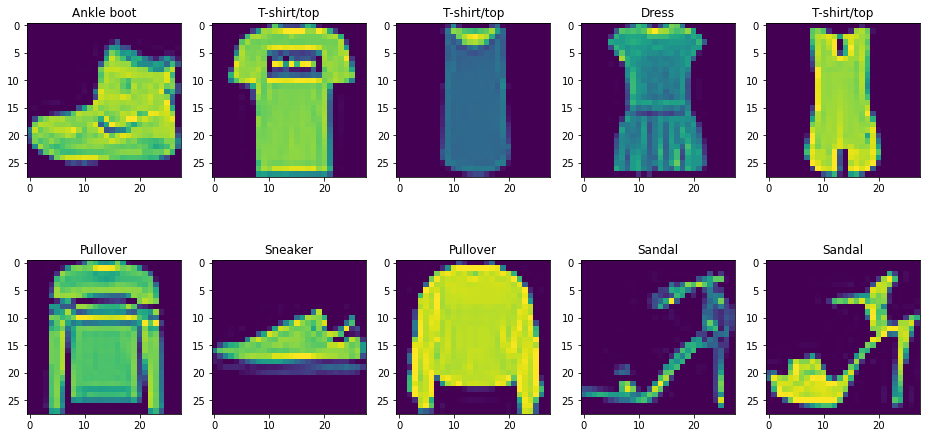

In [61]:
fig, axs = plt.subplots(2, 5, figsize=(16, 8))
axs = axs.flatten()

for x in range(10):
    axs[x].imshow(X_train[x])
    axs[x].set_title(label_dict[y_train[x]])

plt.show()

In [62]:
input_shape = X_train[0].shape
input_shape

(28, 28)

In [63]:
len(label_dict)

10

## NN

In [64]:
X_train = X_train / 255.
X_test = X_test / 255.

In [65]:
input_shape

(28, 28)

In [76]:
# Indicates that the model has sequential layers
model = keras.Sequential([
    # Flattens images dimension (input size)
    keras.layers.Flatten(input_shape=input_shape), 

    # creating a fully connected layer 
    # hiper parameter can be tuned
    keras.layers.Dense(256, activation=nn.relu), # all negative values = 0
    
    keras.layers.Dense(128, activation=nn.relu),
    keras.layers.Dense(64, activation=nn.relu),

    # output
    keras.layers.Dense(10, activation=nn.softmax) # softmax is for probabilities
])

In [77]:
# Compiles model with optmizer and loss function
model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy',
              steps_per_execution=1)

In [78]:
model.fit(X_train, y_train)

1875/1875 [==============================] - 3s 1ms/step - loss: 0.4853
